In [20]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
### constants
LABELS = ["Normal", "Fraud"]
RANDOM_SEED = 105
TEST_SIZE = 0.2
DATASET_NAME = "creditcard.csv"

filenames = [
    'model_1.pkl',
    'model_2.pkl',
    'model_5.pkl',
    'model_10.pkl',
    'model_100.pkl',
    'model_200.pkl',
    'model_1000.pkl',
]

In [76]:
models = []

for filename in filenames:
    with open(filename, 'rb') as f:
        models.append(joblib.load(filename))

In [21]:
### data reading
df = pd.read_csv(DATASET_NAME)

### data preparing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### преобразуем данные, убираем колонку "время", т.к. она ни на что не влияет
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

### отделяем X от Y
Y = data['Class'].values
X = data.drop(['Class'], axis=1).values

#stratify +

### делим данные
_, X_test, __, Y_test = train_test_split(
    X, Y, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=True)

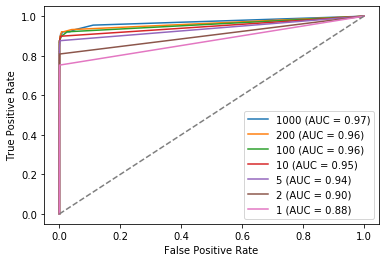

In [77]:
### ROC_AUC comparison
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

for model in models[::-1]:
    svc_disp = plot_roc_curve(model, X_test, Y_test, name=str(model.n_estimators), ax=ax)
ax.plot([0,1],[0,1],'--')

In [78]:
fig.savefig('RandomForestComparison-AUC.svg', dpi=300, facecolor='w', edgecolor='red',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1)

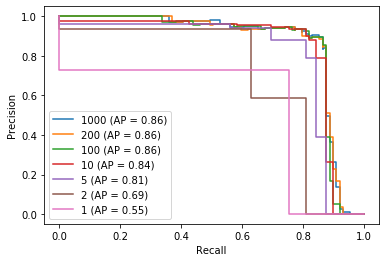

In [79]:
### Precision-recall comparison
from sklearn.metrics import plot_precision_recall_curve

fig, ax = plt.subplots()

for model in models[::-1]:
    svc_disp = plot_precision_recall_curve(model, X_test, Y_test, name=str(model.n_estimators), ax=ax)
#ax.plot([0,1],[0,1],'--')

In [80]:
fig.savefig('RandomForestComparison-PR.svg', dpi=300, facecolor='w', edgecolor='red',
        orientation='portrait', papertype=None, format=None,
        transparent=True, bbox_inches=None, pad_inches=0.1)

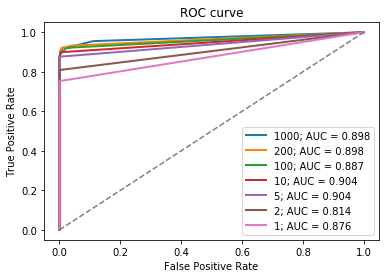

In [127]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_label(model, length=-1):
    part1 = str(model.n_estimators) + ';'
    part2 = 'AUC = ' + str(roc_auc_score(Y_test, model.predict(X_test)))[0:5]
    spaces = length - len(part1) - len(part2)
    return part1 + ' ' * (spaces if spaces > 0 else 1) + part2
'''
labels = []
length = len(get_label(models[-1]))
for model in models[::-1]:
    labels.append(get_label(model, length))
'''
#plt.figure(figsize=(12, 8))
for model in models[::-1]:
    fpr, tpr, _ = roc_curve(Y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    plt.plot(fpr, tpr, lw=2, label=get_label(model))

plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], '--', label='Comparison')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig('ROC.svg')
plt.show()